In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import calinski_harabasz_score,silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score,balanced_accuracy_score
df=pd.read_csv('/content/drive/MyDrive/smdm_data.csv')
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,120,0.000,0.0,0.000,0.000,0.0,0.0,73,0.5,43,...,126,2,0,120,137,121,73,1,9,2
1,132,0.006,0.0,0.006,0.003,0.0,0.0,17,2.1,0,...,198,6,1,141,136,140,12,0,6,1
2,133,0.003,0.0,0.008,0.003,0.0,0.0,16,2.1,0,...,198,5,1,141,135,138,13,0,6,1
3,134,0.003,0.0,0.008,0.003,0.0,0.0,16,2.4,0,...,170,11,0,137,134,137,13,1,6,1
4,132,0.007,0.0,0.008,0.000,0.0,0.0,16,2.4,0,...,170,9,0,137,136,138,11,1,2,1


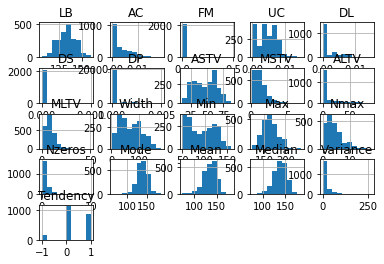

In [2]:
df.iloc[:,:21].hist()
plt.title('Hist before PCA')
plt.show()

In [3]:
X=df.iloc[:,:21]  
Y=df.iloc[:,22]
Z=df.iloc[:,21]
X=np.array(X)

In [4]:

pca=PCA()
scaler=StandardScaler() 
X=scaler.fit_transform(X) 
X=pca.fit_transform(X)
np.round(pca.explained_variance_ratio_,4)

array([0.2885, 0.167 , 0.0869, 0.0713, 0.058 , 0.0486, 0.0468, 0.0441,
       0.0363, 0.0305, 0.0275, 0.0237, 0.0185, 0.0156, 0.0126, 0.0086,
       0.0063, 0.0056, 0.0024, 0.0013, 0.    ])

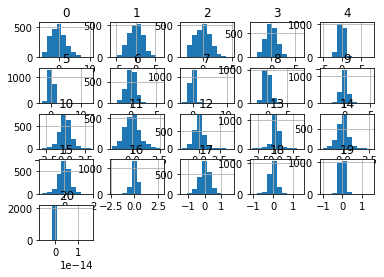

In [5]:
W=pd.DataFrame(X)    #Μετά το scaling και το PCA τα ιστογράμματα των features δείχνουν περισσότερο να ακολουθούν την κανονική κατανομή γεγονός όχι απαραίτητο για τον GMM αλλά προτιμέστερο
W.hist()         #Επιπλέον ο GMM βασίζεται κυρίως στη διασπορά των features οπότε μετά την PCA μπορούμε να έχουμε ευκολότερο feature selection
plt.show()

Text(0.5, 0, 'n_components')

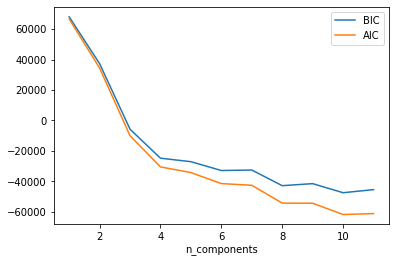

In [6]:
n_components=np.arange(1,12)
models=[GaussianMixture(n,covariance_type='full',random_state=0).fit(X) for n in n_components]
plt.plot(n_components,[m.bic(X) for m in models], label='BIC')
plt.plot(n_components,[m.aic(X) for m in models],label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

Text(0.5, 0, 'n_components')

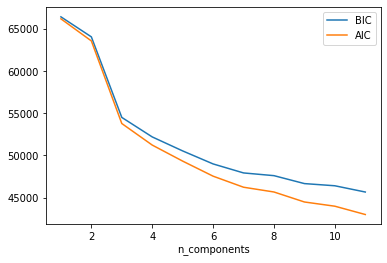

In [7]:
n_components=np.arange(1,12)
models=[GaussianMixture(n,covariance_type='diag',random_state=0).fit(X) for n in n_components]
plt.plot(n_components,[m.bic(X) for m in models], label='BIC')
plt.plot(n_components,[m.aic(X) for m in models],label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

Text(0.5, 0, 'n_components')

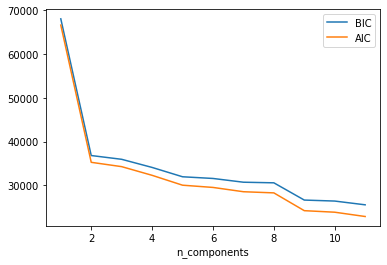

In [8]:
n_components=np.arange(1,12)
models=[GaussianMixture(n,covariance_type='tied',random_state=0).fit(X) for n in n_components]
plt.plot(n_components,[m.bic(X) for m in models], label='BIC')
plt.plot(n_components,[m.aic(X) for m in models],label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

Text(0.5, 0, 'n_components')

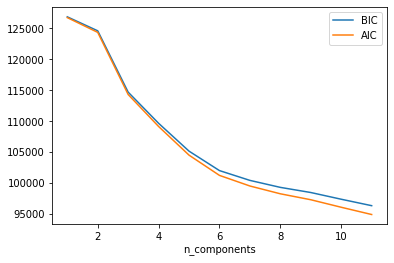

In [9]:
n_components=np.arange(1,12)
models=[GaussianMixture(n,covariance_type='spherical',random_state=0).fit(X) for n in n_components]
plt.plot(n_components,[m.bic(X) for m in models], label='BIC')
plt.plot(n_components,[m.aic(X) for m in models],label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

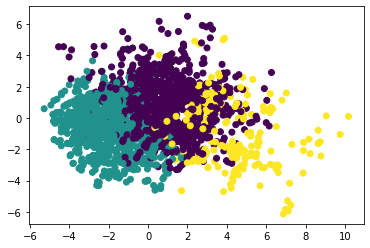

Silhouetter Score: 0.134
Calinski Harabasz Score: 316.700487


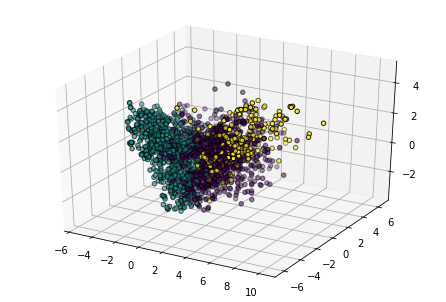

In [10]:
gmm=GaussianMixture(n_components=3,covariance_type='full',random_state=12,n_init=15)
gmm.fit(X)
labels=gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.show()
fig = plt.figure() # make 3d fig
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, edgecolor='k')
fig.show()


from sklearn.metrics import silhouette_score
score=silhouette_score(X,labels,metric='euclidean')
print('Silhouetter Score: %.3f'%score)


cal_score=calinski_harabasz_score(X,labels)
print('Calinski Harabasz Score: %3f'%cal_score)

In [11]:
np.unique(Y, return_counts=True)

(array([1, 2, 3]), array([1655,  295,  176]))

# Με κ=10    Τελικά αν και το AIC παίρνει ελάχιστη τιμή κοντά στο n=10 φαίνεται ότι οι συστάδες που δημιουργολυνται διαφέρουν αρκετά από τις ομάδες της μεταβλητής 'CLASS'

In [ ]:
np.unique(Z, return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([384, 579,  53,  81,  72, 332, 252, 107,  69, 197]))

In [ ]:
gmm=GaussianMixture(n_components=10,covariance_type='spherical',random_state=12,n_init=15)
gmm.fit(X)
labels=gmm.predict(X)
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([313, 203, 379, 128, 250, 307, 151, 210, 167,  18]))

Prediction accuracy for the testing dataset is:  20.5 %
Prediction balanced accuracy for the testing dataset is:  44.7 %
--------------- Confusion Matrix ---------------
[[151  80   0   0  52   6   8   0  73  14]
 [142 161   0 121  52  81   3   9   5   5]
 [ 32   1   0   0  11   8   0   0   1   0]
 [  0   2   0  59   0  20   0   0   0   0]
 [  1  29   0   0  28   2   0   0   6   6]
 [ 32   2  12  70   9 119  75  13   0   0]
 [ 17   0   3   0  19  76 114  23   0   0]
 [  0   0   3   0   0   0   2 102   0   0]
 [  3   2   0   0   3   0   0   4  35  22]
 [  1  30   0   0  36   1   1   0  47  81]]


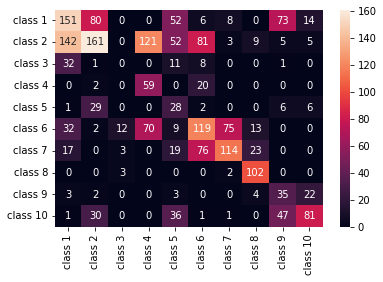

In [ ]:
gmm=GaussianMixture(n_components=10,covariance_type='spherical',random_state=12,n_init=15)
gmm.fit(X)
labels=gmm.predict(X)

labels[np.where(labels==2)]=11  #1
labels[np.where(labels==5)]=12  #2
labels[np.where(labels==9)]=13  #3
labels[np.where(labels==4)]=14  #4
labels[np.where(labels==7)]=15  #5
labels[np.where(labels==0)]=16  #6
labels[np.where(labels==1)]=17  #7
labels[np.where(labels==6)]=18  #8
labels[np.where(labels==8)]=19  #9
labels[np.where(labels==3)]=20 #10

labels[np.where(labels==11)]=1  #11
labels[np.where(labels==12)]=2  #12
labels[np.where(labels==13)]=3  #13
labels[np.where(labels==14)]=4  #14
labels[np.where(labels==15)]=5  #15
labels[np.where(labels==16)]=6  #16
labels[np.where(labels==17)]=7  #17
labels[np.where(labels==18)]=8  #18
labels[np.where(labels==19)]=9  #19
labels[np.where(labels==20)]=10 #20
print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(Y,labels)*100, 1), "%")
print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(Z,labels)*100, 1), "%")
print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(Z,labels))
classes_names = ['class 1','class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9','class 10']
clus_names=['class 1','class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9','class 10']
cm = pd.DataFrame(confusion_matrix(Z, labels), columns=clus_names, index = classes_names)
sns.heatmap(cm, annot=True, fmt='d');

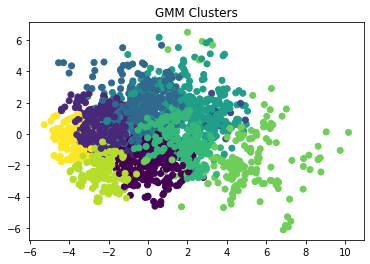

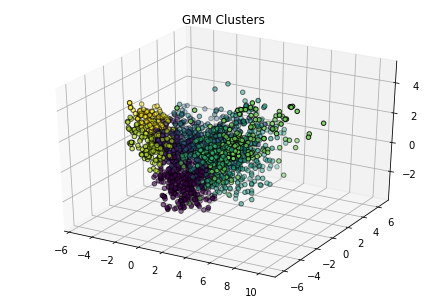

In [ ]:
plt.scatter(X[:, 0], X[:, 1],c=labels)
plt.title("GMM Clusters")
fig = plt.figure() 
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, edgecolor='k')
plt.title("GMM Clusters")
fig.show()

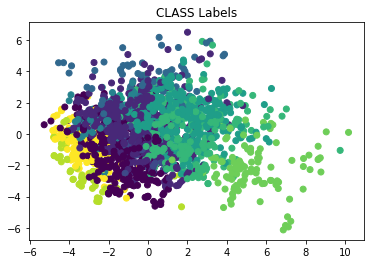

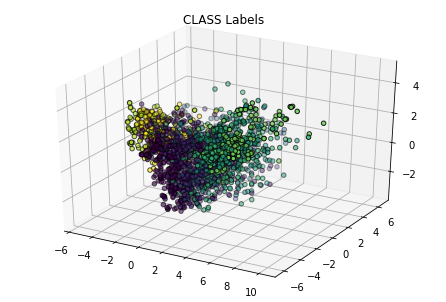

In [ ]:
plt.scatter(X[:,0], X[:,1],c=Z)    #Για να δούμε τα πλοτς με labels την πραγματική τιμή στόχου της NSP
plt.title("CLASS Labels")
plt.show()                #Βλέπουμε στο δισδιάστατο πλοτ πως η μία κλάση είναι κυρίως αριστερά η άλλη εκτείνεται στο μεγαλύτερο μέρος του κέντρου ενώ η τρίτη απλώνεται κυρίως δεξιά ενώ έχει αρκετά σημεία αριστερά,δηλαδή ο άξονας χ που αποτελείται από την πρώτη συνιστώσα('0') φαίνεται να παίζει το μεγαλύτερο ρόλο στην συσταδοποίηση
fig = plt.figure()        
ax = Axes3D(fig)
ax.scatter( X[:,0], X[:,1],X[:,2],c=Z, edgecolor='k')
plt.title("CLASS Labels")
fig.show()

# Με κ=3

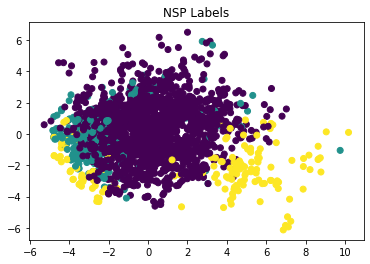

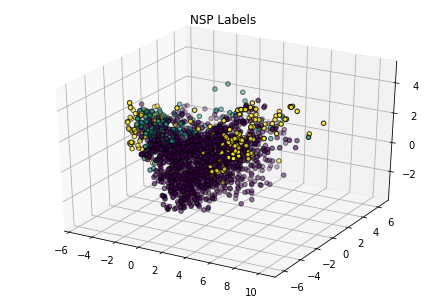

In [13]:
plt.scatter(X[:,0], X[:,1],c=Y)    #Για να δούμε τα πλοτς με labels την πραγματική τιμή στόχου της NSP
plt.title("NSP Labels")
plt.show()                #Βλέπουμε στο δισδιάστατο πλοτ πως η μία κλάση είναι κυρίως αριστερά η άλλη εκτείνεται στο μεγαλύτερο μέρος του κέντρου ενώ η τρίτη απλώνεται κυρίως δεξιά ενώ έχει αρκετά σημεία αριστερά,δηλαδή ο άξονας χ που αποτελείται από την πρώτη συνιστώσα('0') φαίνεται να παίζει το μεγαλύτερο ρόλο στην συσταδοποίηση
fig = plt.figure()        
ax = Axes3D(fig)
ax.scatter( X[:,0], X[:,1],X[:,2],c=Y, edgecolor='k')
plt.title("NSP Labels")
fig.show()

In [14]:
np.unique(Y, return_counts=True)

(array([1, 2, 3]), array([1655,  295,  176]))

In [16]:
gmm=GaussianMixture(n_components=3,covariance_type='full',random_state=12,n_init=15)
gmm.fit(X)
labels=gmm.predict(X)
np.unique(labels, return_counts=True)

(array([0, 1, 2]), array([ 903, 1009,  214]))

Prediction accuracy for the testing dataset is:  55.8 %
Prediction balanced accuracy for the testing dataset is:  63.0 %
--------------- Confusion Matrix ---------------
[[850 708  97]
 [ 45 235  15]
 [  8  66 102]]


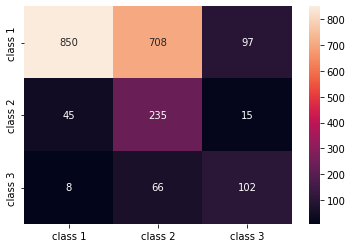

In [17]:
gmm=GaussianMixture(n_components=3,covariance_type='full',random_state=12,n_init=15)    # k=3 full 55.8%
gmm.fit(X)
labels=gmm.predict(X)
labels[np.where(labels==0)]=4  #1
labels[np.where(labels==1)]=5  #2
labels[np.where(labels==2)]=6  #3

labels[np.where(labels==4)]=1  
labels[np.where(labels==5)]=2  
labels[np.where(labels==6)]=3 

print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(Y,labels)*100, 1), "%")

print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(Y,labels)*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(Y,labels))
classes_names = ['class 1','class 2','class 3']
cm = pd.DataFrame(confusion_matrix(Y, labels), columns=classes_names, index = classes_names)
sns.heatmap(cm, annot=True, fmt='d');

Prediction accuracy for the testing dataset is:  47.5 %
Prediction balanced accuracy for the testing dataset is:  42.4 %
--------------- Confusion Matrix ---------------
[[782 859  14]
 [ 76 216   3]
 [105  59  12]]


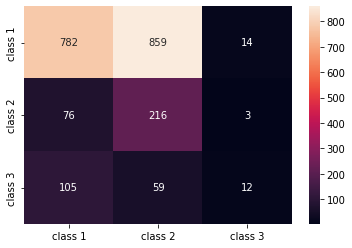

In [ ]:
gmm=GaussianMixture(n_components=3,covariance_type='tied',random_state=12,n_init=15)    #tied  47.5%
gmm.fit(X)
labels=gmm.predict(X)
labels[np.where(labels==2)]=4  #1
labels[np.where(labels==1)]=5  #2
labels[np.where(labels==0)]=6  #3

labels[np.where(labels==4)]=1  
labels[np.where(labels==5)]=2  
labels[np.where(labels==6)]=3 

print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(Y,labels)*100, 1), "%")

print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(Y,labels)*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(Y,labels))
classes_names = ['class 1','class 2','class 3']
cm = pd.DataFrame(confusion_matrix(Y, labels), columns=classes_names, index = classes_names)
sns.heatmap(cm, annot=True, fmt='d');

Prediction accuracy for the testing dataset is:  66.9 %
Prediction balanced accuracy for the testing dataset is:  69.1 %
--------------- Confusion Matrix ---------------
[[1078  428  149]
 [  34  235   26]
 [   4   62  110]]


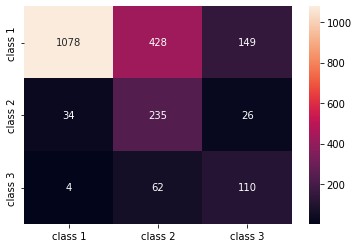

In [ ]:
gmm=GaussianMixture(n_components=3,covariance_type='spherical',random_state=12,n_init=15)    #spherical 66.9%
gmm.fit(X)
labels=gmm.predict(X)
labels[np.where(labels==0)]=4  #1
labels[np.where(labels==1)]=5  #2
labels[np.where(labels==2)]=6  #3

labels[np.where(labels==4)]=1  
labels[np.where(labels==5)]=2  
labels[np.where(labels==6)]=3 

print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(Y,labels)*100, 1), "%")

print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(Y,labels)*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(Y,labels))
classes_names = ['class 1','class 2','class 3']
cm = pd.DataFrame(confusion_matrix(Y, labels), columns=classes_names, index = classes_names)
sns.heatmap(cm, annot=True, fmt='d');

Prediction accuracy for the testing dataset is:  56.1 %
Prediction balanced accuracy for the testing dataset is:  60.0 %
--------------- Confusion Matrix ---------------
[[893 622 140]
 [ 81 194  20]
 [ 33  37 106]]


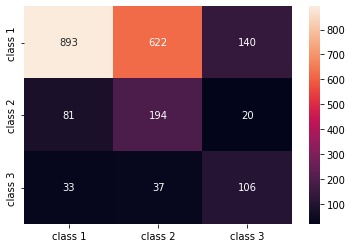

In [ ]:
gmm=GaussianMixture(n_components=3,covariance_type='diag',random_state=12,n_init=15)    #diag 56.1%
gmm.fit(X)
labels=gmm.predict(X)
labels[np.where(labels==2)]=4  #1
labels[np.where(labels==0)]=5  #2
labels[np.where(labels==1)]=6  #3

labels[np.where(labels==4)]=1  
labels[np.where(labels==5)]=2  
labels[np.where(labels==6)]=3 

print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(Y,labels)*100, 1), "%")

print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(Y,labels)*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(Y,labels))
classes_names = ['class 1','class 2','class 3']
cm = pd.DataFrame(confusion_matrix(Y, labels), columns=classes_names, index = classes_names)
sns.heatmap(cm, annot=True, fmt='d');

# Ο GMM δείχνει να προτιμά το covariance='spherical' στο dataset

Prediction accuracy for the testing dataset is:  75.6 %
Prediction balanced accuracy for the testing dataset is:  71.0 %
--------------- Confusion Matrix ---------------
[[1279  295   81]
 [  61  221   13]
 [   6   63  107]]


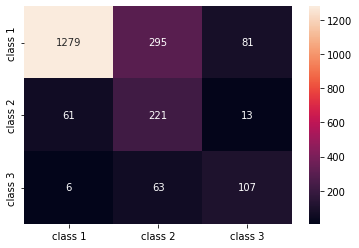

In [ ]:
W=X[:,:5]
gmm=GaussianMixture(n_components=3,covariance_type='spherical',random_state=12,n_init=15)    #Με 5 features καi spherical 75.6% !!
gmm.fit(W)
labels=gmm.predict(W)
labels[np.where(labels==1)]=4  #1
labels[np.where(labels==2)]=5  #2
labels[np.where(labels==0)]=6  #3

labels[np.where(labels==4)]=1  
labels[np.where(labels==5)]=2  
labels[np.where(labels==6)]=3 

print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(Y,labels)*100, 1), "%")

print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(Y,labels)*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(Y,labels))
classes_names = ['class 1','class 2','class 3']
cm = pd.DataFrame(confusion_matrix(Y, labels), columns=classes_names, index = classes_names)
sns.heatmap(cm, annot=True, fmt='d');

Prediction accuracy for the testing dataset is:  47.6 %
Prediction balanced accuracy for the testing dataset is:  41.7 %
--------------- Confusion Matrix ---------------
[[871 555 229]
 [255  31   9]
 [ 67   0 109]]


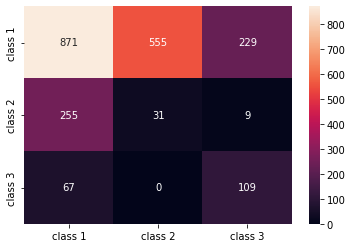

In [ ]:
W=X[:,:2]
gmm=GaussianMixture(n_components=3,covariance_type='spherical',random_state=12,n_init=15)    #
gmm.fit(W)
labels=gmm.predict(W)
labels[np.where(labels==1)]=4  #1
labels[np.where(labels==2)]=5  #2
labels[np.where(labels==0)]=6  #3

labels[np.where(labels==4)]=1  
labels[np.where(labels==5)]=2  
labels[np.where(labels==6)]=3 

print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(Y,labels)*100, 1), "%")

print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(Y,labels)*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(Y,labels))
classes_names = ['class 1','class 2','class 3']
cm = pd.DataFrame(confusion_matrix(Y, labels), columns=classes_names, index = classes_names)
sns.heatmap(cm, annot=True, fmt='d');

Prediction accuracy for the testing dataset is:  81.5 %
Prediction balanced accuracy for the testing dataset is:  72.2 %
--------------- Confusion Matrix ---------------
[[1416  209   30]
 [  78  212    5]
 [  12   60  104]]


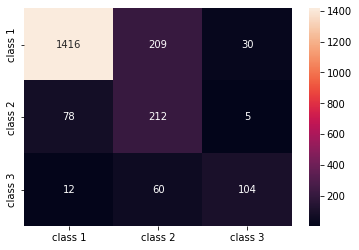

In [18]:
W=X[:,:3]
gmm=GaussianMixture(n_components=3,covariance_type='spherical',random_state=12,n_init=15)    #Με 3 features 81.5% σπεκτακιουλαρ!!
gmm.fit(W)
labels=gmm.predict(W)
labels[np.where(labels==1)]=4  #1
labels[np.where(labels==0)]=5  #2
labels[np.where(labels==2)]=6  #3

labels[np.where(labels==4)]=1  
labels[np.where(labels==5)]=2  
labels[np.where(labels==6)]=3 

print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(Y,labels)*100, 1), "%")

print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(Y,labels)*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(Y,labels))
classes_names = ['class 1','class 2','class 3']
cm = pd.DataFrame(confusion_matrix(Y, labels), columns=classes_names, index = classes_names)
sns.heatmap(cm, annot=True, fmt='d');

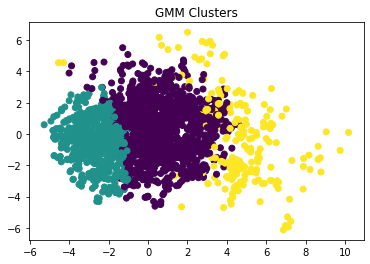

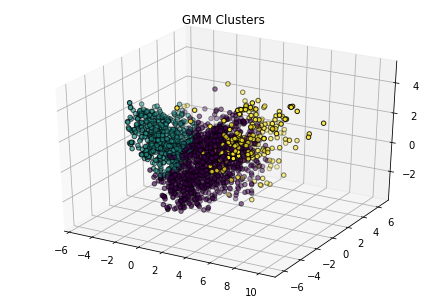

In [ ]:
plt.scatter(X[:, 0], X[:, 1],c=labels)
plt.title("GMM Clusters")
fig = plt.figure() 
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, edgecolor='k')
plt.title("GMM Clusters")
fig.show()

Prediction accuracy for the testing dataset is:  76.0 %
Prediction balanced accuracy for the testing dataset is:  71.0 %
--------------- Confusion Matrix ---------------
[[1284  347   24]
 [  62  230    3]
 [  12   63  101]]


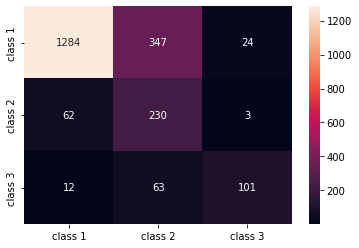

In [ ]:
W=X[:,:4]
gmm=GaussianMixture(n_components=3,covariance_type='spherical',random_state=12,n_init=15)    #
gmm.fit(W)
labels=gmm.predict(W)
labels[np.where(labels==1)]=4  #1
labels[np.where(labels==2)]=5  #2
labels[np.where(labels==0)]=6  #3

labels[np.where(labels==4)]=1  
labels[np.where(labels==5)]=2  
labels[np.where(labels==6)]=3 

print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(Y,labels)*100, 1), "%")

print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(Y,labels)*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(Y,labels))
classes_names = ['class 1','class 2','class 3']
cm = pd.DataFrame(confusion_matrix(Y, labels), columns=classes_names, index = classes_names)
sns.heatmap(cm, annot=True, fmt='d');

Prediction accuracy for the testing dataset is:  73.1 %
Prediction balanced accuracy for the testing dataset is:  70.7 %
--------------- Confusion Matrix ---------------
[[1217  362   76]
 [  49  231   15]
 [   7   63  106]]


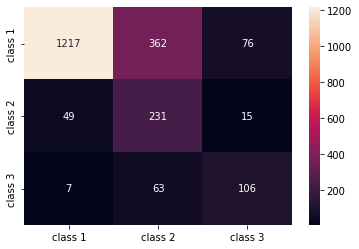

In [ ]:
W=X[:,:6]
gmm=GaussianMixture(n_components=3,covariance_type='spherical',random_state=12,n_init=15)    #
gmm.fit(W)
labels=gmm.predict(W)
labels[np.where(labels==0)]=4  #1
labels[np.where(labels==2)]=5  #2
labels[np.where(labels==1)]=6  #3

labels[np.where(labels==4)]=1  
labels[np.where(labels==5)]=2  
labels[np.where(labels==6)]=3 

print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(Y,labels)*100, 1), "%")

print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(Y,labels)*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(Y,labels))
classes_names = ['class 1','class 2','class 3']
cm = pd.DataFrame(confusion_matrix(Y, labels), columns=classes_names, index = classes_names)
sns.heatmap(cm, annot=True, fmt='d');

Prediction accuracy for the testing dataset is:  72.2 %
Prediction balanced accuracy for the testing dataset is:  70.0 %
--------------- Confusion Matrix ---------------
[[1201  366   88]
 [  51  228   16]
 [   7   63  106]]


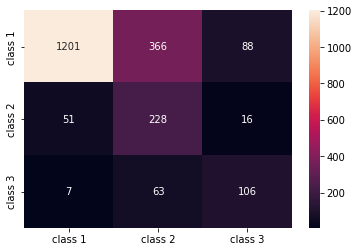

In [ ]:
W=X[:,:7]
gmm=GaussianMixture(n_components=3,covariance_type='spherical',random_state=12,n_init=15)    #
gmm.fit(W)
labels=gmm.predict(W)
labels[np.where(labels==0)]=4  #1
labels[np.where(labels==1)]=5  #2
labels[np.where(labels==2)]=6  #3

labels[np.where(labels==4)]=1  
labels[np.where(labels==5)]=2  
labels[np.where(labels==6)]=3 

print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(Y,labels)*100, 1), "%")

print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(Y,labels)*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(Y,labels))
classes_names = ['class 1','class 2','class 3']
cm = pd.DataFrame(confusion_matrix(Y, labels), columns=classes_names, index = classes_names)
sns.heatmap(cm, annot=True, fmt='d');

Prediction accuracy for the testing dataset is:  15.1 %
Prediction balanced accuracy for the testing dataset is:  30.0 %
--------------- Confusion Matrix ---------------
[[  78  401 1176]
 [  14  233   48]
 [ 102   63   11]]


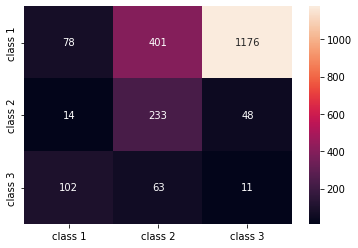

In [ ]:
W=X[:,:8]
gmm=GaussianMixture(n_components=3,covariance_type='spherical',random_state=12,n_init=15)    #
gmm.fit(W)
labels=gmm.predict(W)
labels[np.where(labels==1)]=4  #1
labels[np.where(labels==2)]=5  #2
labels[np.where(labels==0)]=6  #3

labels[np.where(labels==4)]=1  
labels[np.where(labels==5)]=2  
labels[np.where(labels==6)]=3 

print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(Y,labels)*100, 1), "%")

print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(Y,labels)*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(Y,labels))
classes_names = ['class 1','class 2','class 3']
cm = pd.DataFrame(confusion_matrix(Y, labels), columns=classes_names, index = classes_names)
sns.heatmap(cm, annot=True, fmt='d');

Prediction accuracy for the testing dataset is:  15.1 %
Prediction balanced accuracy for the testing dataset is:  29.0 %
--------------- Confusion Matrix ---------------
[[  86  387 1182]
 [  15  226   54]
 [ 104   63    9]]


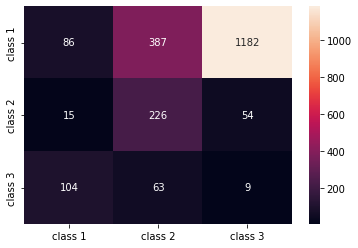

In [ ]:
W=X[:,:9]
gmm=GaussianMixture(n_components=3,covariance_type='spherical',random_state=12,n_init=15)    #
gmm.fit(W)
labels=gmm.predict(W)
labels[np.where(labels==1)]=4  #1
labels[np.where(labels==2)]=5  #2
labels[np.where(labels==0)]=6  #3

labels[np.where(labels==4)]=1  
labels[np.where(labels==5)]=2  
labels[np.where(labels==6)]=3 

print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(Y,labels)*100, 1), "%")

print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(Y,labels)*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(Y,labels))
classes_names = ['class 1','class 2','class 3']
cm = pd.DataFrame(confusion_matrix(Y, labels), columns=classes_names, index = classes_names)
sns.heatmap(cm, annot=True, fmt='d');

Prediction accuracy for the testing dataset is:  58.9 %
Prediction balanced accuracy for the testing dataset is:  37.8 %
--------------- Confusion Matrix ---------------
[[1170  103  382]
 [  49   20  226]
 [   6  107   63]]


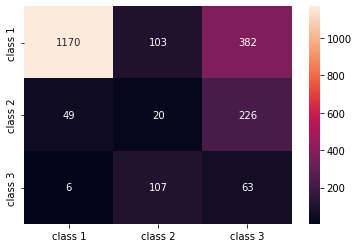

In [ ]:
W=X[:,:10]
gmm=GaussianMixture(n_components=3,covariance_type='spherical',random_state=12,n_init=15)    #
gmm.fit(W)
labels=gmm.predict(W)
labels[np.where(labels==1)]=4  #1
labels[np.where(labels==2)]=5  #2
labels[np.where(labels==0)]=6  #3

labels[np.where(labels==4)]=1  
labels[np.where(labels==5)]=2  
labels[np.where(labels==6)]=3 

print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(Y,labels)*100, 1), "%")

print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(Y,labels)*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(Y,labels))
classes_names = ['class 1','class 2','class 3']
cm = pd.DataFrame(confusion_matrix(Y, labels), columns=classes_names, index = classes_names)
sns.heatmap(cm, annot=True, fmt='d');

Prediction accuracy for the testing dataset is:  58.4 %
Prediction balanced accuracy for the testing dataset is:  37.5 %
--------------- Confusion Matrix ---------------
[[1159  108  388]
 [  46   20  229]
 [   6  107   63]]


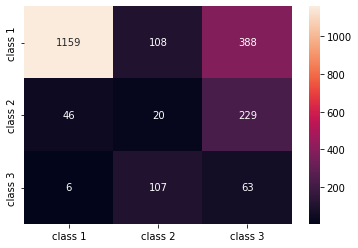

In [ ]:
W=X[:,:11]
gmm=GaussianMixture(n_components=3,covariance_type='spherical',random_state=12,n_init=15)    #
gmm.fit(W)
labels=gmm.predict(W)
labels[np.where(labels==1)]=4  #1
labels[np.where(labels==2)]=5  #2
labels[np.where(labels==0)]=6  #3

labels[np.where(labels==4)]=1  
labels[np.where(labels==5)]=2  
labels[np.where(labels==6)]=3 

print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(Y,labels)*100, 1), "%")

print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(Y,labels)*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(Y,labels))
classes_names = ['class 1','class 2','class 3']
cm = pd.DataFrame(confusion_matrix(Y, labels), columns=classes_names, index = classes_names)
sns.heatmap(cm, annot=True, fmt='d');

Prediction accuracy for the testing dataset is:  56.5 %
Prediction balanced accuracy for the testing dataset is:  36.8 %
--------------- Confusion Matrix ---------------
[[1117  114  424]
 [  40   21  234]
 [   5  108   63]]


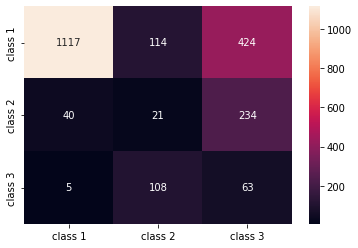

In [ ]:
W=X[:,:12]
gmm=GaussianMixture(n_components=3,covariance_type='spherical',random_state=12,n_init=15)    #
gmm.fit(W)
labels=gmm.predict(W)
labels[np.where(labels==1)]=4  #1
labels[np.where(labels==2)]=5  #2
labels[np.where(labels==0)]=6  #3

labels[np.where(labels==4)]=1  
labels[np.where(labels==5)]=2  
labels[np.where(labels==6)]=3 

print("Prediction accuracy for the testing dataset is: ", np.round(accuracy_score(Y,labels)*100, 1), "%")

print("Prediction balanced accuracy for the testing dataset is: ", np.round(balanced_accuracy_score(Y,labels)*100, 1), "%")

print("--------------- Confusion Matrix ---------------")
print(confusion_matrix(Y,labels))
classes_names = ['class 1','class 2','class 3']
cm = pd.DataFrame(confusion_matrix(Y, labels), columns=classes_names, index = classes_names)
sns.heatmap(cm, annot=True, fmt='d');